  <h1><center>Brief Introduction to Program for Agglomerative Clustering</center></h1>

The aim of this notebook is to walk you through the code for Agglomerative  Clustering, and to give you a feel of it's advantages (ease in choosing number of clusters due to practical visualization) and disadvantages (Time Complexity $O^3$) due to which it is almost never used in practical scenarios. (Please note that single linecomments in Python are denoted by hash **#<comment>** and multiline comments are denoted by 3 double quotes: **"""**

In [0]:
"""
Importing a few frequently used libraries in python.
"""
import numpy as np #lib for optimized numerical operations and data handling in python.
import matplotlib.pyplot as plt #lib for visualization and plotting.
import pandas as pd #loading/handling .csv data.

## Dataset Description
There is this big mall called $\alpha$-mall in your city. The mall took 200 of it's most frequent customers and made them fill an e-form where they collected various attributes of the customers. They also collected something called a 'spending score', which is indicative of the average amount of money they spend on each visit. Now, the task given to us is we need to group these customers  using their **income** and **spending score**. 
However, **the mall doesnot have any information about the number of clusters or the type of clusters that the mall is looking for.**    

In [2]:
"""
getting and looking at our dataset.
"""
url = "https://raw.githubusercontent.com/Ujjawal-K-Panchal/Agglomerative-Clustering-Introduction/master/Mall_Customers.csv"
dataset = pd.read_csv(url) #get dataset from URL.
print('Dataset:')
dataset.head() #prints the first 5 rows of our dataset.



Dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
"""
Putting our columns on interest: Annual Income(column 3) and Spending Score (column 4) in a variable. Call it X.
"""
X = dataset.iloc[:,3:5] #note, in python, plain ':' without limits, is a fancy way of saying all rows.

#Lets see what X looks like:
print('X:')
X.head() #prints the first 5 rows.

X:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Getting Number of Clusters using Dendrogram (Advantage)

A dendrogram is generally a 2D-plot and a visual method for choosing number of clusters in Agglomerative clustering. On X-axis, we have our customers (data points, more generally) and on Y-axis, we have some way of measuring dissimilarity of our customers and later, also clusters we will form.

As we know, in agglomerative clustering, we start with n observations, merge the two least dissimilar entities and repeat this step till we have 1 huge cluster.   

**Dendrogram, roughly speaking, just records the dissimilarity measure of the two entities that were merged together and puts all of them in a plot in front of us. So, we can, using a given (or intuitive) minimum value of dissimilarity, say $\beta$, take the number of clusters in the dendrogram at that point in Y-axis.** 

Note: Our chosen measure of dissimilarity will be Euclidean distance:
      $D(a, b) = \sqrt{(x_a^2 - x_b^2) + (y_a^2 - y_b^2)}$

(Because it's very common and easy to understand). 


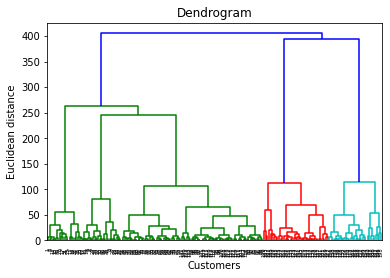

In [4]:
"""
Creating and visualizing our Dendrogram
"""
import scipy.cluster.hierarchy as sch #this library allows us to create our dendrogram.

#In the below lines, sch.dendrogram() creates a dendrogram plot. 
#Here, sch.linkage connects our data to dissimilarity measure.
# X is our data, For the sake of simplicity, lets ignore method = 'ward'. Pls. read up if interested. It's really cool.  
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) 

plt.title('Dendrogram') #give title to plot. 
plt.xlabel('Customers') #give x axis label to plot.
plt.ylabel('Euclidean distance') #give y axis label to plot.
plt.show() #show the plot.

Now, lets assume our dissimilarity threshold, i.e. $\beta$ to be equal to 200 units (intuitively). That gives us our number of clusters to be = 5 clusters. (You can see there are 5 unmerged entities at 200 on Y-axis).  

## Clustering our Customers and Visualizing the Clusters.

In [0]:
"""
Creating and Assigning our Clusters.
"""
from sklearn.cluster import AgglomerativeClustering #importing agg.clus. method.

X = X.values #Now we don't need the column names etc. but we convert X to a matrix of just numbers so computer can make computations on it.

#creating our model hc. which will make 5 clusters, using euclidean distance. (Ignore ward, readup if interested). 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #hc = hierarchical clustering model.
y_hc = hc.fit_predict(X) #y_hc are our predicted cluster numbers for each data point in X using hc model.

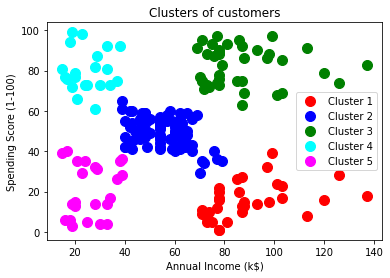

In [6]:
"""
Visualising the clusters.

"""

# For the below lines, remember that X[y_hc == n,0] means:
# select 0th column for all rows in X where y_hc (assigned cluster number) is n.
# eg. X[y_hc == 3, 1] means :> Select column 1 for all rows of X where y_hc is 3. 
# s = 100 means size of the plotted point, c = 'red' means color red, label is for legend of graph, i.e. red points = cluster 1.
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#setting plot properties.
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #shows what color what cluster belongs to. How? : Do you remember we set labels during our plt.scatter() ? :) 
plt.show()

## Time Taken for Agglomerative vs. K-Means Clustering (Disadvantage)

Okay, So before, we dive into the code, we must think to ourselves. If the time complexity is such a disadvantage that it is almost never practically used, how was it so quick for us?

Ans.: Our dataset was only of 200 points. Many datasets available online have 10k+ points. Real world datasets belonging to MNCs, sometimes have, billions (if not more) of records generated everyday (Big Data). Agglomerative will be just too slow for that.  

In [11]:
"""
Comparing time it takes for Hierarchical (Agglomerative) Clustering vs. K Means (Divisive) Clustering.
"""
#expanding our dataset by just copying data to simulate one with more samples by copying itself.
# Warning <!>: This is done to just simulate how it would work on a larger dataset. Copying data to itself is not useful (in most cases).
var = dataset.iloc[:,3:5] #temp variable used for timing. 
for i in range(6):
    var = np.concatenate([var, var], axis = 0)

print(var.shape)
from sklearn.cluster import KMeans #note, we had previously imported Agglomerative, so no need to do again.
import time # we will time the two algos. using this.

#Timing Hierarchical Clustering. (Agglomerative)
before = time.time()
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #hc = hierarchical clustering model.
y_hc = hc.fit_predict(var)
after = time.time()

print('Agglomerative Clustering takes to train and predict:', after - before, 'seconds')

#Timing KMeans Clustering. (Divisive)
before = time.time()
hc = KMeans(n_clusters = 5) #hc = hierarchical clustering model.
y_hc = hc.fit_predict(var)
after = time.time()

print('K-Means Clustering takes to train and predict:', after - before, 'seconds')

(12800, 2)
Agglomerative Clustering takes to train and predict: 3.231194019317627 seconds
K-Means Clustering takes to train and predict: 0.18489384651184082 seconds
